In [69]:
import numpy as np
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt

In [9]:
seed = 42

In [131]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=seed)

In [117]:
k = 3
max_iter = 250

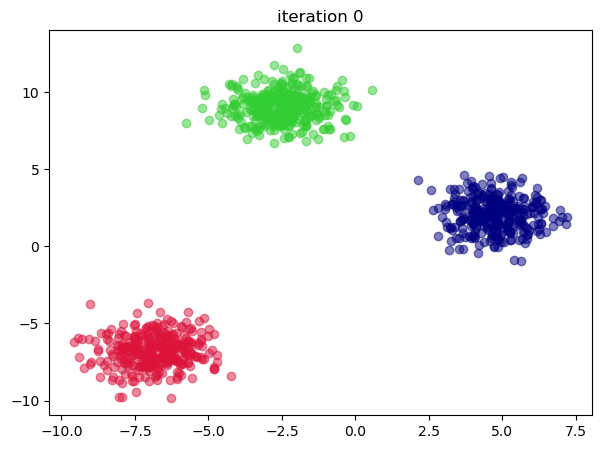

c:\Users\queir\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\queir\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


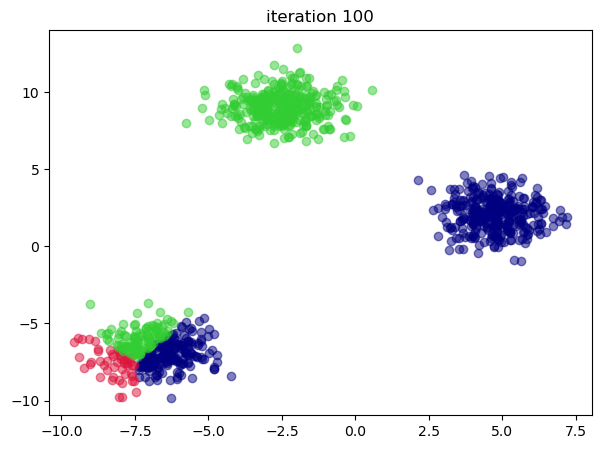

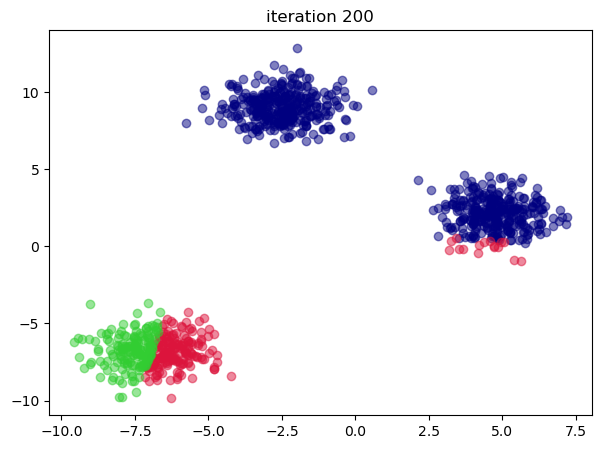

In [133]:
for _ in range(max_iter):
    initial_centroids = {i : random.choices(X, k=k)[i] for i in range(3)}
    centroids = initial_centroids

    clustering_map = {c: [] for c in range(k)}
    for x in X:
        distances_map = {}
        for c, centroid in centroids.items():
            distances_map[c] = np.linalg.norm(centroid-x)

        nearest_cluster = min(distances_map, key=distances_map.get)
        clustering_map[nearest_cluster].append(x)

    centroids = {i : np.mean(clustering_map[i], axis=0) for i in range(3)}
    clustering_map = {i: np.array(clustering_map[i]) for i in range(k)}

    if _%100==0:
        fig = plt.figure(figsize=(7, 5))
        if len(clustering_map[0]) > 0:
            plt.scatter(clustering_map[0][:,0], clustering_map[0][:,1], color='navy', alpha=0.5)
        if len(clustering_map[1]) > 0:
            plt.scatter(clustering_map[1][:,0], clustering_map[1][:,1], color='crimson', alpha=0.5)
        if len(clustering_map[2]) > 0:
            plt.scatter(clustering_map[2][:,0], clustering_map[2][:,1], color='limegreen', alpha=0.5)
        plt.title(f'iteration {_}')
        plt.show()

In [137]:
from sklearn.cluster import KMeans

In [138]:
kmeans = KMeans(n_clusters=k, random_state=seed, n_init="auto").fit(X)
clustering_map = {c: [] for c in range(k)}

for i in range(len(X)):
    x = X[i]
    c = kmeans.labels_[i]
    clustering_map[c].append(x)

clustering_map = {i: np.array(clustering_map[i]) for i in range(k)}

c:\Users\queir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


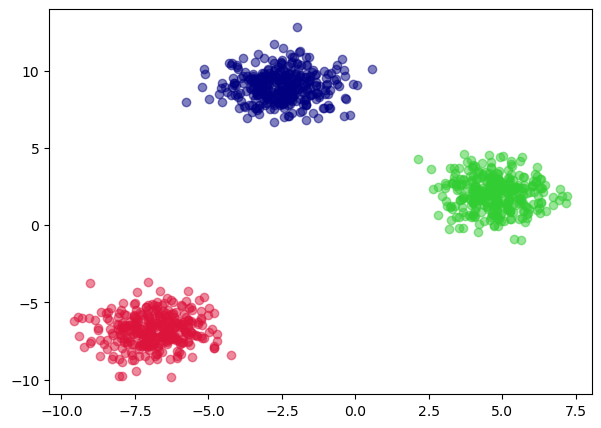

In [139]:
fig = plt.figure(figsize=(7, 5))
if len(clustering_map[0]) > 0:
    plt.scatter(clustering_map[0][:,0], clustering_map[0][:,1], color='navy', alpha=0.5)
if len(clustering_map[1]) > 0:
    plt.scatter(clustering_map[1][:,0], clustering_map[1][:,1], color='crimson', alpha=0.5)
if len(clustering_map[2]) > 0:
    plt.scatter(clustering_map[2][:,0], clustering_map[2][:,1], color='limegreen', alpha=0.5)
    
plt.show()

Why the scikit-learn library can separate the data better the built in algorithm?